# 6.6 Sourcing & Analyzing Time-Series Data 

## IMF Macroeconomic Statistics  - Finland

## This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing IMF Macroeconomic Statistics - Finland


### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate,e.g, a suspended library or feature

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'dATKrENquaGYyy_VrhKq'

In [3]:
# Importing the IMF Country Macroeconomic Statistics Data for Finland

data = quandl.get('ODA/FIN_NGDPRPPPPC')

In [4]:
data.head(5)

,Value
Date,
1980-12-31,21949.51
1981-12-31,22156.91
1982-12-31,22725.32
1983-12-31,23291.74
1984-12-31,23901.22


In [5]:
data.shape

(45, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

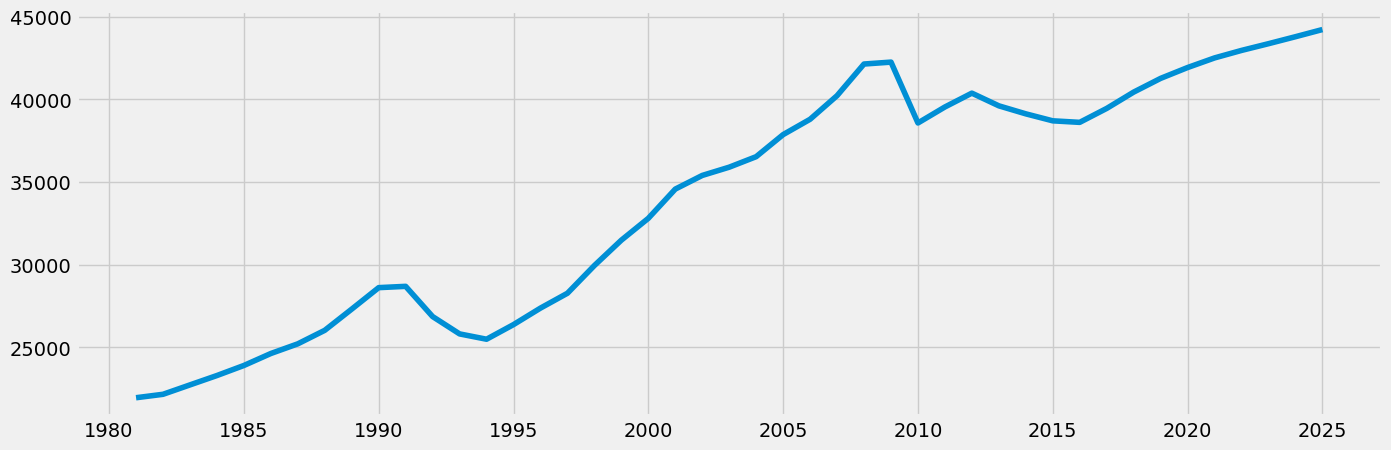

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100.


plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Reset index to use the "Date" column as a filter

data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1980-12-31,21949.51
1,1981-12-31,22156.91
2,1982-12-31,22725.32
3,1983-12-31,23291.74
4,1984-12-31,23901.22


In [11]:
#create subset including "Date" column
data_sub = data_2.loc[(data_2['Date'] >= '1980-12-31') & (data_2['Date'] < '2021-12-31')]

#### Sub setting to narrow observation between 1980 (as far back as the data provided)  and 2021 (to avoid any forecasted data as 2022 data may not have been documented at this moment)

In [12]:
data_sub.shape

(41, 2)

In [13]:
data_sub.head()

,Date,Value
0,1980-12-31,21949.51
1,1981-12-31,22156.91
2,1982-12-31,22725.32
3,1983-12-31,23291.74
4,1984-12-31,23901.22


In [14]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-12-31,21949.51
1981-12-31,22156.91
1982-12-31,22725.32
1983-12-31,23291.74
1984-12-31,23901.22


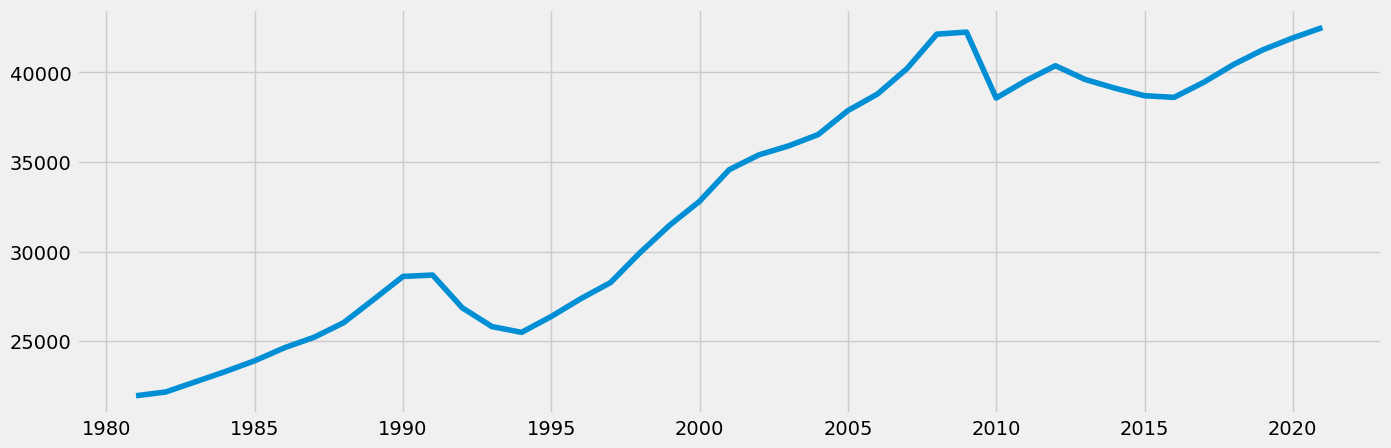

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [16]:
# Check for missing values

data_sub.isnull().sum()

Value    0
dtype: int64

In [17]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

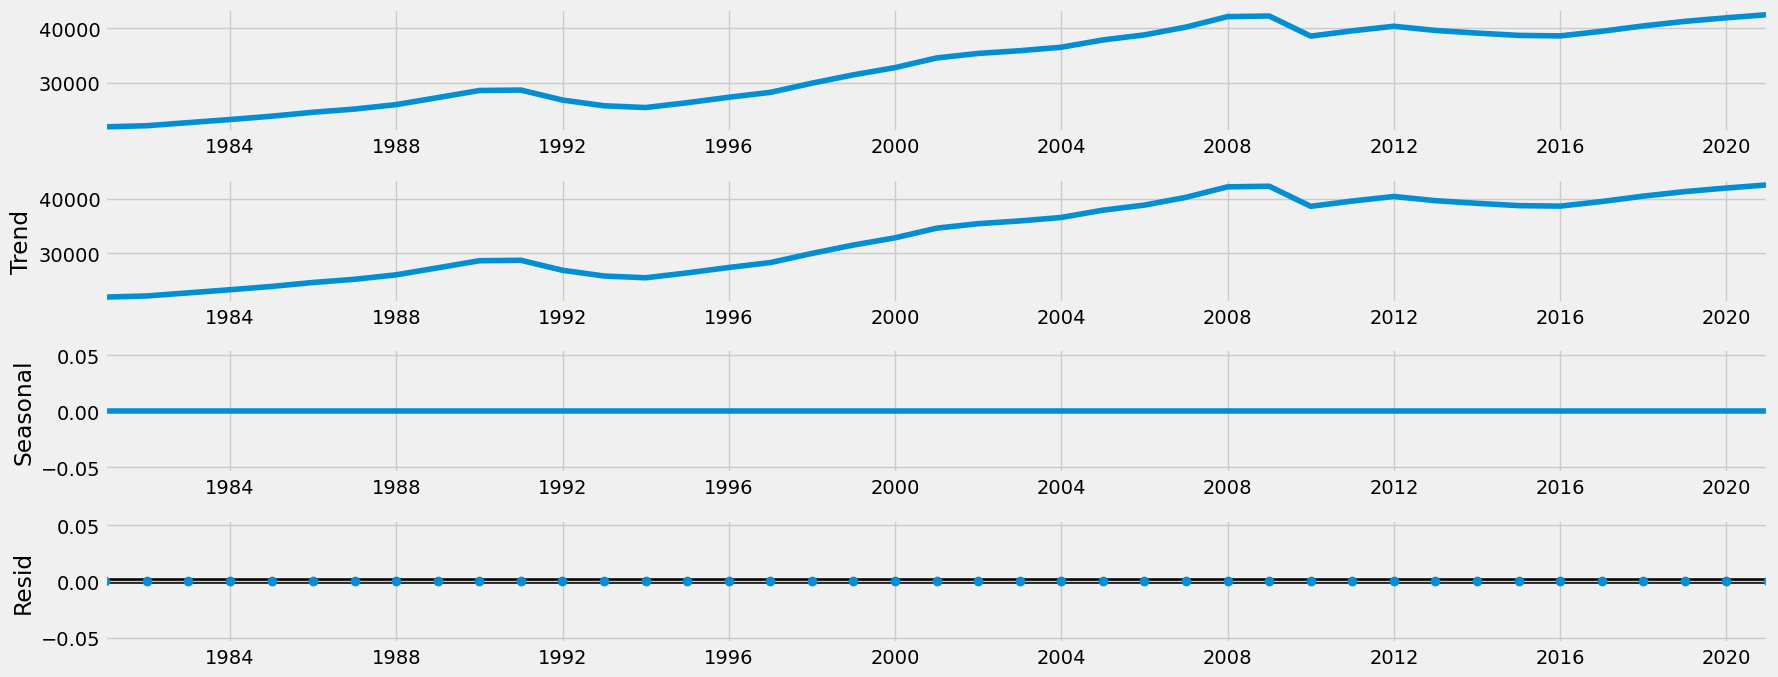

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

#### - The level and the trend appear the same because the data doesn't have much noise
#### - The trend in the chart has an upward trend after 1980 then deeps slightly after 1992. It continues upward with a jump around                   2009, likely due to the global financial crisis, the overall trend continues to increase all the way until 2021
#### - The Seasonality curve is flat indicating that there is no seasonality
#### - The noise line is flat as expected with no noise seen from the trend

### 4. Testing for Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.009563
p-value                         0.749761
Number of Lags Used             1.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


#### Disprove the null hypothesis(The presence of a unit root meaning that the data is stationary) = no unit root = stationary data =                can proceed with forecast
#### Cannot reject null hypothesis because:
#### i) The Test statistic (-1.009563) is larger than critical value (-2.939109) 
#### ii) p-value (0.749761) is greater than 0.05

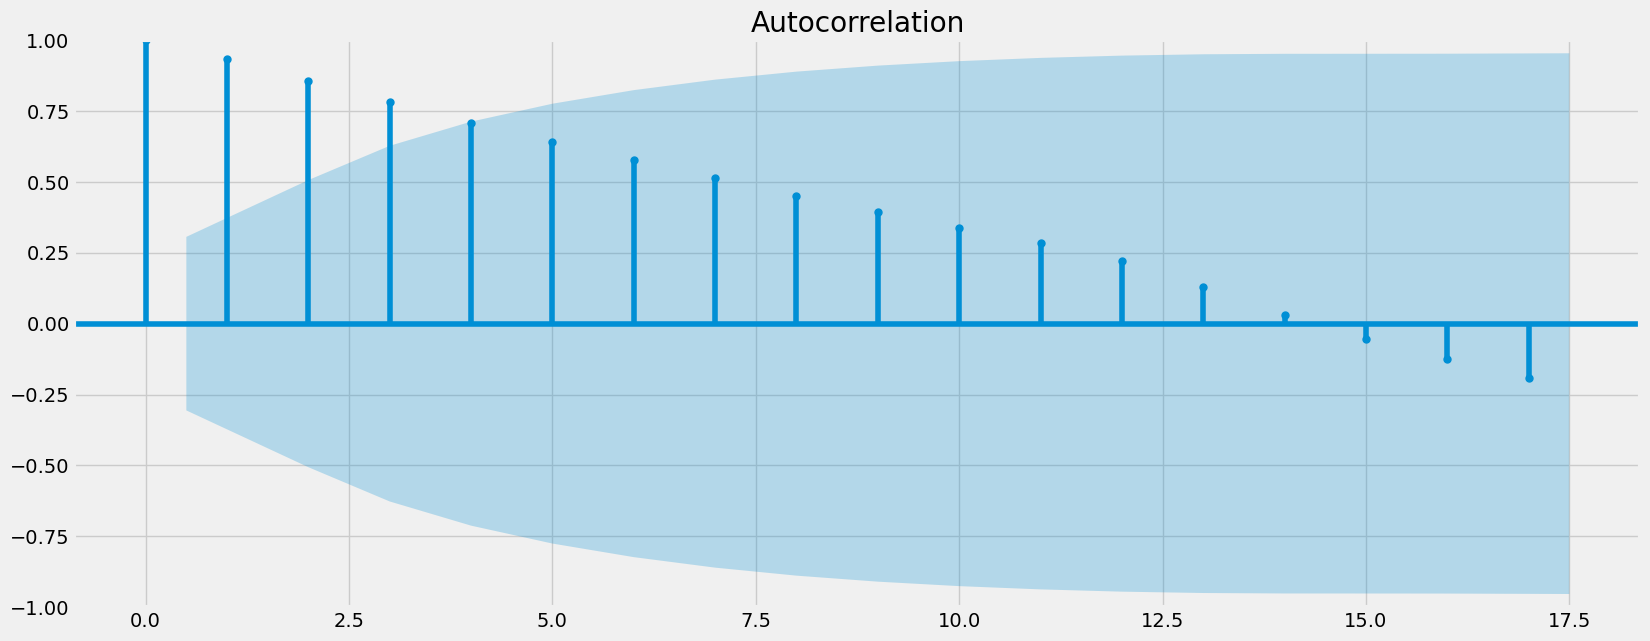

In [22]:
# Test for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

#### Conclusion: Above tests have proven that the data is non-stationary

### 5. Stationarizing IMF Macroeconomic Statistics - Finland

In [23]:
# transform time series into a new time series
data_diff = data_sub - data_sub.shift(1) #The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
# remove the missing values caused by the differencing 
data_diff.dropna(inplace = True) 

In [25]:
data_diff.head()


,Value
datetime,
1981-12-31,207.40
1982-12-31,568.41
1983-12-31,566.42
1984-12-31,609.48
1985-12-31,724.53


In [26]:
data_diff.columns

Index(['Value'], dtype='object')

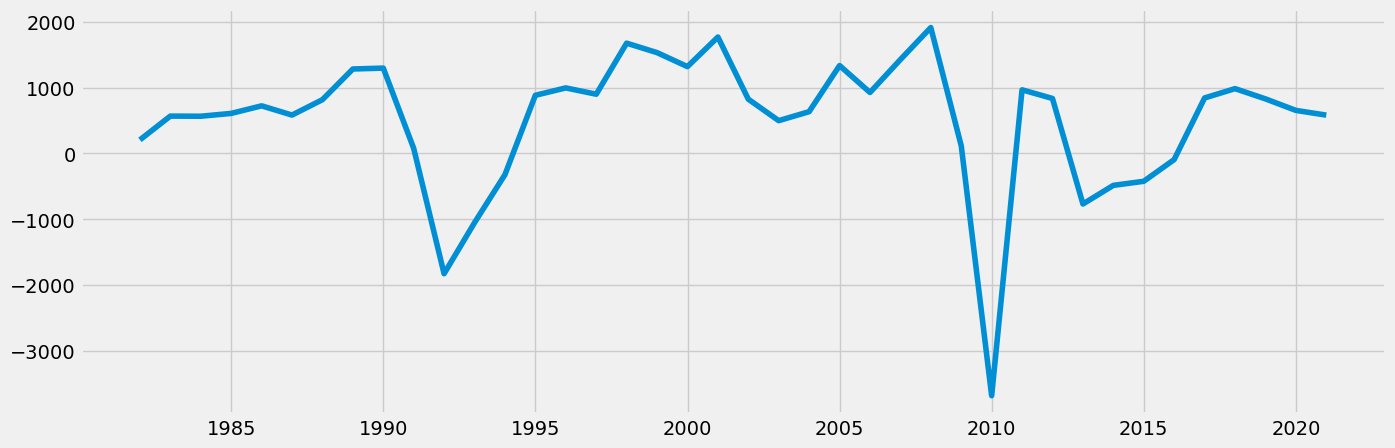

In [27]:
# plot time-series curve following differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.240443
p-value                         0.000562
Number of Lags Used             0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


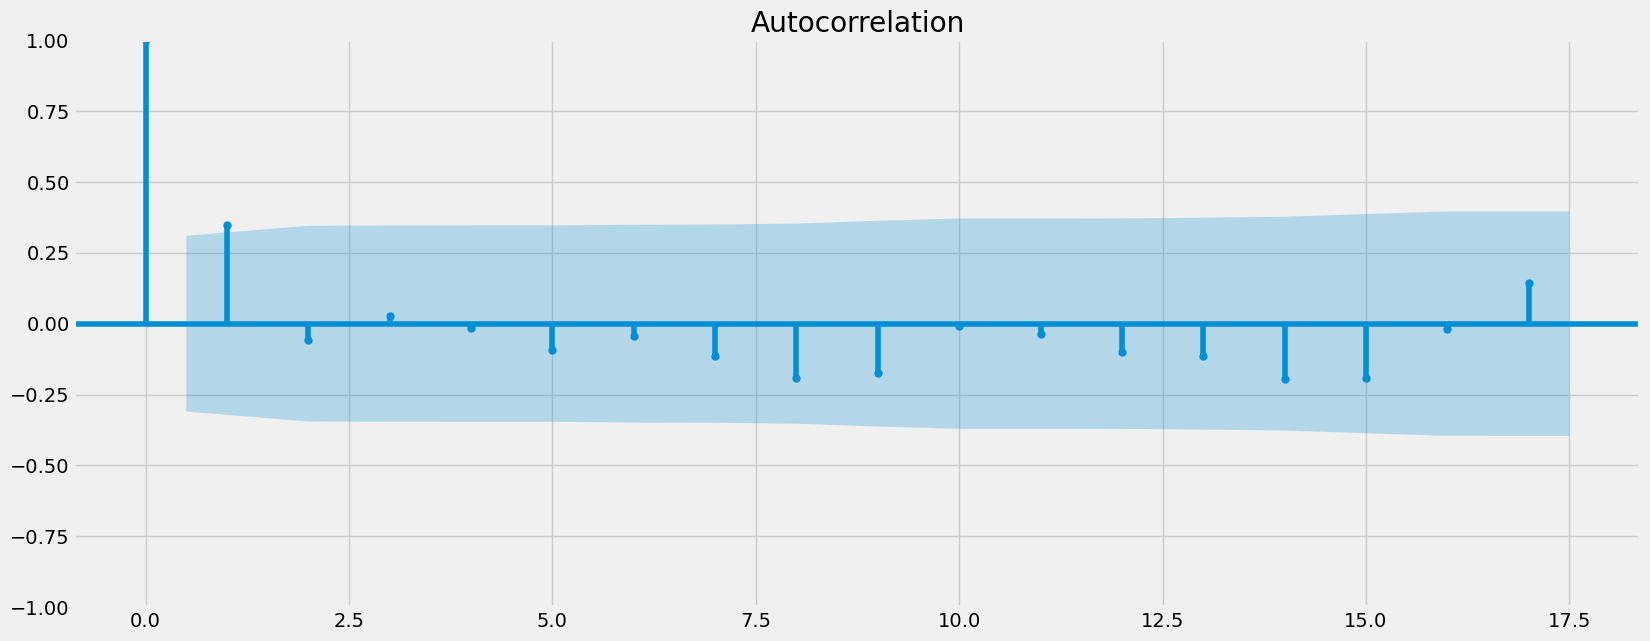

In [29]:
# recheck the data’s autocorrelations
plot_acf(data_diff)
plt.show()

### Test statistic smaller than critical value = can reject null hypothesis
### i) The Test statistic (-4.240443) is smaller than critical value (-2.939109)
### ii) p-value (0.000562) is less than 0.05
### iii) Autocorrelation has also improved with now only 1 significant lag 

### Time series now stationary!

### Resources: https://data.nasdaq.com/data/ODA-imf-cross-country-macroeconomic-statistics?page=15